|Name:| Tufan Kundu|
|-|-|
|Registration no:| 24MDT0184|
|Course Name:| Deep Learning Lab|
|Course Code:| PMDS603P|
|Experiment:| 2|
|Date:| 24 July,2025|

## Question1. Today, we will try to recall the logistic regression model that you have seen in your Machine learning Course. With the given dataset ’liver patient.csv’ we will first fit a logistic regression model. Then we can see how a deep learning model framework can be used to create a model that does the same job.

### importing the necessary libraries

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

### Loading the dataset

In [2]:
df = pd.read_csv("liver_patient.csv")
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


### Dropping the unnecessary gender column

In [3]:
df.drop('Gender', axis = 1 , inplace = True)

### Min max scaling

In [4]:
MM = MinMaxScaler()
X = MM.fit_transform(df)

### Splitting data intro train test split

In [5]:
x = X[:,:9]
y = X[:,9]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [6]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)
y_pred = logistic_model.predict(x_test)
print(f"Accuracy score:{accuracy_score(y_test,y_pred)*100:.2f}%")

Accuracy score:71.79%


### Using Keras

In [7]:
import keras 
from keras.models import Sequential 
from keras.layers import Dense
import warnings 
warnings.filterwarnings('ignore')

In [8]:
model = Sequential()
model.add(Dense(1,activation = 'sigmoid', input_shape = (9,)))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10 (40.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
from keras.optimizers import SGD
model.compile(loss = 'BinaryCrossentropy', optimizer='SGD', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=50, epochs=500, 
                    verbose=1, validation_data=(x_test, y_test))


Epoch 1/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.6387 - loss: 0.6703 - val_accuracy: 0.6581 - val_loss: 0.6687
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6612 - loss: 0.6656 - val_accuracy: 0.6581 - val_loss: 0.6642
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6856 - loss: 0.6574 - val_accuracy: 0.6667 - val_loss: 0.6598
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6808 - loss: 0.6591 - val_accuracy: 0.6923 - val_loss: 0.6561
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7128 - loss: 0.6479 - val_accuracy: 0.6923 - val_loss: 0.6526
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6923 - loss: 0.6493 - val_accuracy: 0.6923 - val_loss: 0.6494
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7065 - loss: 0.6447 - val_accuracy: 0.6923 - val_loss: 0.6466
Epoch 8/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7114 - loss: 0.6460 - val_accuracy: 0.

In [10]:
# Training accuracy over epochs
train_accuracies = history.history['accuracy']

# Validation accuracy over epochs
val_accuracies = history.history['val_accuracy']

# Final validation accuracy
print(f"Final Validation Accuracy: {val_accuracies[-1] * 100:.2f}%")


Final Validation Accuracy: 70.94%


### Visualizing train and validation accuracy 

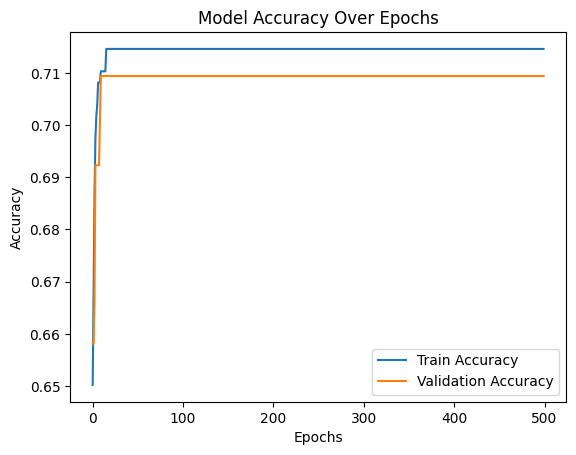

In [11]:
import matplotlib.pyplot as plt

plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Over Epochs')
plt.show()


## Adding 2 neurons in the output layer

In [12]:
### This step does one hot encoding for the output variable 
y_train_2 = keras.utils.to_categorical(y_train,2)
y_test_2 = keras.utils.to_categorical(y_test,2)

In [13]:
model = Sequential()
model.add(Dense(2,activation = 'softmax', input_shape = (9,)))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 2)              │            20 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20 (80.00 B)

 Trainable params: 20 (80.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss = "CategoricalCrossentropy", optimizer='SGD', metrics = ['accuracy'])
history = model.fit(x_train, y_train_2, batch_size=50, epochs=500, 
                    verbose=1, validation_data=(x_test, y_test_2))

Epoch 1/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.3976 - loss: 0.7431 - val_accuracy: 0.3761 - val_loss: 0.7263
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4320 - loss: 0.7200 - val_accuracy: 0.4786 - val_loss: 0.7077
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4700 - loss: 0.7083 - val_accuracy: 0.5812 - val_loss: 0.6934
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5106 - loss: 0.6994 - val_accuracy: 0.5983 - val_loss: 0.6805
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5784 - loss: 0.6747 - val_accuracy: 0.6410 - val_loss: 0.6698
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6253 - loss: 0.6709 - val_accuracy: 0.6496 - val_loss: 0.6618
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6164 - loss: 0.6684 - val_accuracy: 0.6581 - val_loss: 0.6543
Epoch 8/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6291 - loss: 0.6635 - val_accuracy: 0.

In [15]:
final_val_accuracy = history.history['val_accuracy'][-1]
print(f"Final Validation Accuracy: {final_val_accuracy * 100:.2f}%")


Final Validation Accuracy: 70.94%


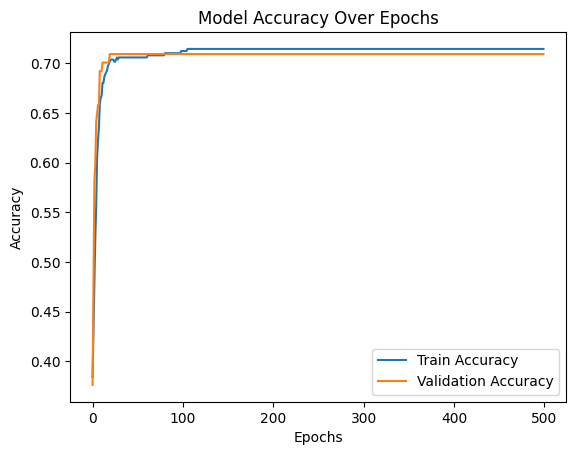

In [16]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.legend()
plt.show()

### Model with 9 neurons in the input layer, 10 neurons in the hidden layer and 2 neurons in the output layer

In [17]:
model = Sequential()
model.add(Dense(10, activation = 'sigmoid', input_shape = (9,)))
model.add(Dense(1,activation = 'sigmoid'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 10)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111 (444.00 B)

 Trainable params: 111 (444.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(loss = "BinaryCrossentropy", optimizer = "SGD", metrics = ["accuracy"])
history = model.fit(x_train,y_train, batch_size=50, epochs = 500, verbose=1, validation_data=(x_test,y_test))

Epoch 1/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.2962 - loss: 0.8416 - val_accuracy: 0.2906 - val_loss: 0.8108
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2898 - loss: 0.8043 - val_accuracy: 0.2906 - val_loss: 0.7735
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2934 - loss: 0.7660 - val_accuracy: 0.2906 - val_loss: 0.7425
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2869 - loss: 0.7364 - val_accuracy: 0.2906 - val_loss: 0.7165
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2889 - loss: 0.7137 - val_accuracy: 0.4359 - val_loss: 0.6950
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5092 - loss: 0.6917 - val_accuracy: 0.7265 - val_loss: 0.6772
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6820 - loss: 0.6766 - val_accuracy: 0.7094 - val_loss: 0.6635
Epoch 8/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6651 - loss: 0.6715 - val_accuracy: 0.

In [19]:
final_val_accuracy = history.history['val_accuracy'][-1]
print(f"Final Validation Accuracy: {final_val_accuracy * 100:.2f}%")


Final Validation Accuracy: 70.94%


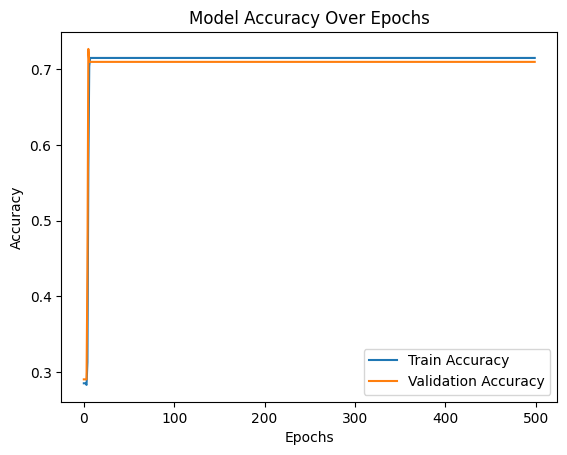

In [20]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.legend()
plt.show()

## Question:2 There are many activation function we can use in out process of creating models. Appart from the sigmoid activation function one can also use activation function like relu (which is defined as relu(z) = max(0,z)) in the intermediate layer neurons. Try to create a model which gives a better accuracy than the above ones you had by altering the architecture and activation functions. You can also try to change the batch size in your training process.

### Using relu activation, batch_size = 25 and 1000 epochs

In [21]:
model = Sequential()
model.add(Dense(10, activation = 'relu',input_shape = (9,)))
model.add(Dense(1,activation = 'sigmoid'))
model.summary()
model.compile(loss = "BinaryCrossentropy", optimizer = "SGD", metrics = ["accuracy"])
history = model.fit(x_train,y_train, batch_size=25, epochs = 1000, verbose=1, validation_data=(x_test,y_test))

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 10)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111 (444.00 B)

 Trainable params: 111 (444.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.3690 - loss: 0.7095 - val_accuracy: 0.4786 - val_loss: 0.6981
Epoch 2/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5532 - loss: 0.6935 - val_accuracy: 0.6496 - val_loss: 0.6796
Epoch 3/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7083 - loss: 0.6704 - val_accuracy: 0.6838 - val_loss: 0.6663
Epoch 4/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7244 - loss: 0.6542 - val_accuracy: 0.7009 - val_loss: 0.6567
Epoch 5/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6949 - loss: 0.6536 - val_accuracy: 0.7009 - val_loss: 0.6489
Epoch 6/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7095 - loss: 0.6433 - val_accuracy: 0.7009 - val_loss: 0.6430
Epoch 7/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7155 - loss: 0.6378 - val_accuracy: 0.7009 - val_loss: 0.6384
Epoch 8/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6991 - loss: 0.6446 - val_accu

In [22]:

val_acc = history.history['val_accuracy'][-1]
print(f"Final accuracy using Relu activation function {val_acc*100:.2f}%")

Final accuracy using Relu activation function 74.36%


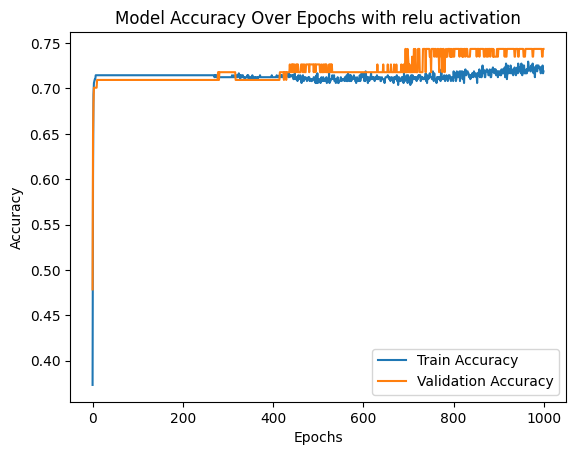

In [23]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Epochs with relu activation')
plt.legend()
plt.show()

### Using tanh activation, batch_size = 40 and 1000 epochs

In [24]:
model = Sequential()
model.add(Dense(10, activation = 'tanh',input_shape = (9,)))
model.add(Dense(1,activation = 'sigmoid'))
model.summary()
model.compile(loss = "BinaryCrossentropy", optimizer = "SGD", metrics = ["accuracy"])
history = model.fit(x_train,y_train, batch_size=40, epochs = 1000, verbose=1, validation_data=(x_test,y_test))

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 10)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111 (444.00 B)

 Trainable params: 111 (444.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5882 - loss: 0.6841 - val_accuracy: 0.5726 - val_loss: 0.6780
Epoch 2/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5964 - loss: 0.6680 - val_accuracy: 0.6667 - val_loss: 0.6577
Epoch 3/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6155 - loss: 0.6498 - val_accuracy: 0.7009 - val_loss: 0.6423
Epoch 4/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6778 - loss: 0.6310 - val_accuracy: 0.6838 - val_loss: 0.6305
Epoch 5/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7049 - loss: 0.6135 - val_accuracy: 0.6752 - val_loss: 0.6214
Epoch 6/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7117 - loss: 0.5959 - val_accuracy: 0.6923 - val_loss: 0.6152
Epoch 7/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6886 - loss: 0.6063 - val_accuracy: 0.6923 - val_loss: 0.6101
Epoch 8/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6793 - loss: 0.6106 - val_accura

In [25]:

val_acc = history.history['val_accuracy'][-1]
print(f"Final accuracy using tanh activation function {val_acc*100:.2f}%")

Final accuracy using tanh activation function 74.36%


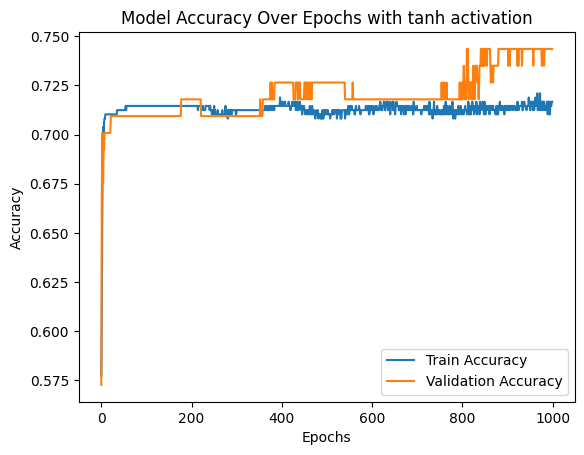

In [26]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Epochs with tanh activation')
plt.legend()
plt.show()

|activation function| batch size| accuracy|
|-|-|-|
|sigmoid| 50| 70.94%|
|relu |25 |74.36%|
|tanh| 40| 74.36%|

## Question:3 Next let us try a multi class classification problem where we will work with the mnist dataset. It contains 70000 handwritten images of digits from 0 to 9. So its a 10 class classification problem. Lets try to create a model that can do the classification task.

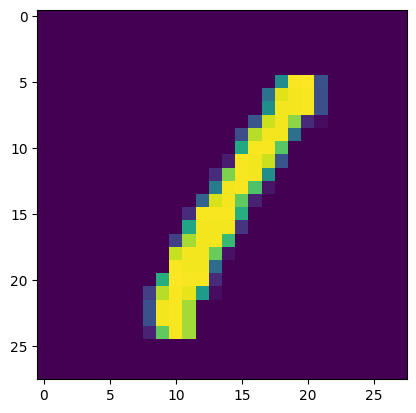

In [33]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD
import matplotlib.pyplot as plt

batch_size = 128
num_classes = 10
epochs = 10
(x_train,y_train), (x_test,y_test) = mnist.load_data()
plt.imshow(x_train[3])
plt.show()
# print(x_train[3])

### Converting all the values in the array in the range of 0 to 1 for better training by the neural network.

In [35]:
x_train = x_train/255
x_test = x_test/255


### Making the artificial neural network

In [48]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))


In [49]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])

- ### If we use sparse_categorical_crossentropy we need not one hot encode the output variable , whereas if we use categorical_crossentropy we need to one hot encode the output variable

In [55]:
history = model.fit(x_train,y_train, batch_size = batch_size, epochs = 10, validation_split=0.2, verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9985 - loss: 0.0041 - val_accuracy: 0.9765 - val_loss: 0.1371
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9988 - loss: 0.0038 - val_accuracy: 0.9743 - val_loss: 0.1469
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9969 - loss: 0.0092 - val_accuracy: 0.9746 - val_loss: 0.1387
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9989 - loss: 0.0029 - val_accuracy: 0.9778 - val_loss: 0.1339
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9998 - loss: 0.0014 - val_accuracy: 0.9776 - val_loss: 0.1308
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 1.0000 - loss: 3.7422e-04 - val_accuracy: 0.9781 - val_loss: 0.1303
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 1.0000 - loss: 1.8339e-04 - val_accuracy: 0.9787 - val_loss: 0.1324
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 1.0000 - loss: 1.3987e-04 - val_

In [56]:
y_prob = model.predict(x_test)
y_pred = y_prob.argmax(axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [57]:
from sklearn.metrics import accuracy_score
print(f"Accuracy:{accuracy_score(y_test,y_pred)*100:.2f}%")

Accuracy:98.00%


### Checking the results

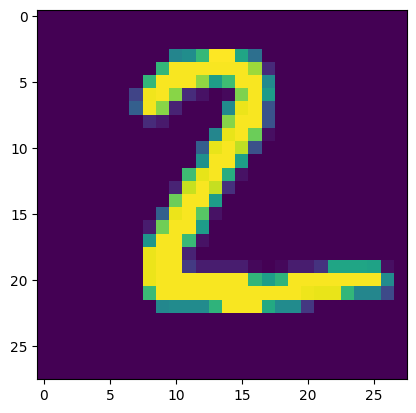

In [60]:
plt.imshow(x_test[1])
plt.show()

In [61]:
model.predict(x_test[1].reshape(1,28,28)).argmax(axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


array([2])

## Question:4 Next our task is to write a scratch code for a simple feed forward network that does a task. This model has inputs as [0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1] and the expected output as [0], [1], [1], [0] in each case. So there are three features in our dataset as you see above. The activation function is to be taken as sigmoid. The architecture is like we have only one hidden layer and an output layer with one neuron. Take the error function as (1/2)(y − yˆ)2

In [64]:
import numpy as np 

# sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# derivative of sigmoid function
def sigmoid_derivative(x):
    return x*(1-x)

# mean squared error loss
def mse_loss(y_true,y_pred):
    return 0.5*np.mean((y_true-y_pred)**2)

# Input dataset (XOR gate inputs with bias term)

x = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])

# output labels
y = np.array([[0],
              [1],
              [1],
              [0]])

# seed for reproducibility
np.random.seed(1)

# Initialize weights randomly with mean 0 
input_size = 3  # 3 input features
hidden_size = 2 # 2 hidden layers
output_size = 1 # 1 output neuron

# Weights
w1 = 2 * np.random.random((input_size, hidden_size))-1
w2 = 2 * np.random.random((hidden_size, output_size))-1

# Biases
b1 = np.zeros((1, hidden_size))
b2 = np.zeros((1, output_size))

# Learning rate 
lr = 0.1

# Training loop
for epoch in range(10000):
    
    ##------------- Forward pass -------------------
    a1 = np.dot(x,w1) + b1 
    h1 = sigmoid(a1)    # activation of hidden layer
    
    a2 = np.dot(h1,w2) + b2
    output = sigmoid(a2) # final prediction
    
    # loss calculation 
    loss = mse_loss(y,output)
    
    ##-------------- Back propagation ---------------
    # output layer error
    output_error = output - y 
    output_delta = output_error * sigmoid_derivative(output)
    
    ## hidden layer error
    hidden_error = np.dot(output_delta, w2.T)
    hidden_delta = hidden_error * sigmoid_derivative(h1)
    
    ##------------Updating weights and biases -----------
    w2 -= lr * np.dot(h1.T,output_delta)
    b2 -= lr * np.sum(output_delta, axis = 0, keepdims = True)
    
    w1 -= lr * np.dot(x.T, hidden_delta)
    b1 -= lr * np.sum(hidden_delta, axis = 0, keepdims = True)
    
    # Print loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# --------- Final Output ---------
print("\nFinal predictions after training:")
print(output.round(3))
    

Epoch 0, Loss: 0.1267
Epoch 1000, Loss: 0.1215
Epoch 2000, Loss: 0.1029
Epoch 3000, Loss: 0.0905
Epoch 4000, Loss: 0.0828
Epoch 5000, Loss: 0.0433
Epoch 6000, Loss: 0.0105
Epoch 7000, Loss: 0.0049
Epoch 8000, Loss: 0.0031
Epoch 9000, Loss: 0.0022

Final predictions after training:
[[0.049]
 [0.945]
 [0.945]
 [0.071]]


In [65]:
y_pred_binary = (output > 0.5).astype(int)
print("Predicted labels:", y_pred_binary.ravel())
print("True labels:     ", y.ravel())

Predicted labels: [0 1 1 0]
True labels:      [0 1 1 0]
